In [1]:
import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import prettypyplot as pplt
import scipy
import seaborn as sns
from matplotlib import ticker

import extq

In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import plotting
import util

In [3]:
pplt.load_cmaps()
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
mpl.colormaps.register(cm_div, force=True)

In [4]:
%config InlineBackend.figure_format = "retina"

## fix phosphate

In [103]:
# hb = np.load(f"{DATA_DIR}/raw_feat/hbond_phos_anton2.npy", allow_pickle=True)
hb = np.load(f"{DATA_DIR}/raw_feat/hbond_phos_179-300.npy", allow_pickle=True)

In [104]:
print(hb.shape)
hb = hb.T
print(hb.shape)
print(np.reshape(np.concatenate(hb[0]), (-1, 5)).shape)

second_half = []
for i in range(57):
    second_half.append(np.reshape(np.concatenate(hb[i]), (-1, 5), order='F'))

(5, 57)
(57, 5)
(100000, 5)


In [75]:
np.save(f"{DATA_DIR}/raw_feat/hbond_phos_179-300_reshaped.npy", second_half)

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


(array([2.06842e+05, 2.70160e+04, 3.38170e+04, 6.74500e+04, 4.23440e+04,
        4.06850e+04, 6.69040e+04, 1.47822e+05, 2.62715e+05, 6.74280e+04,
        2.07800e+04, 2.15000e+04, 1.95380e+04, 2.17490e+04, 3.01890e+04,
        2.16510e+04, 9.45500e+03, 1.83600e+03, 2.44000e+02, 3.50000e+01]),
 array([0.    , 0.3115, 0.623 , 0.9345, 1.246 , 1.5575, 1.869 , 2.1805,
        2.492 , 2.8035, 3.115 , 3.4265, 3.738 , 4.0495, 4.361 , 4.6725,
        4.984 , 5.2955, 5.607 , 5.9185, 6.23  ]),
 <BarContainer object of 20 artists>)

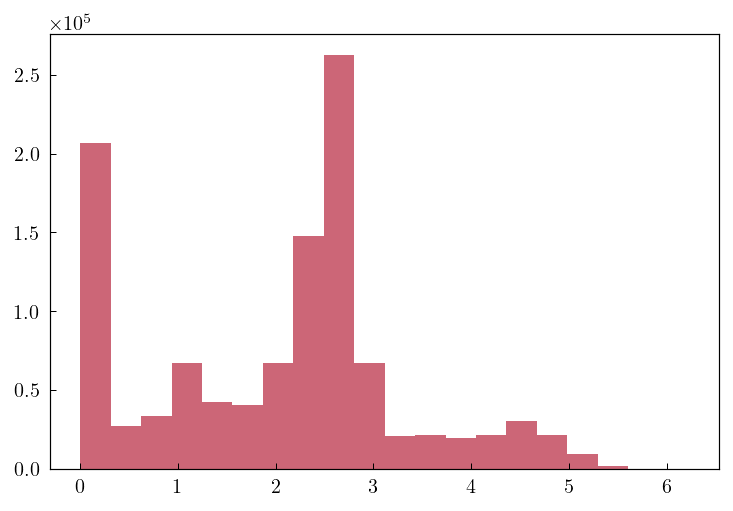

In [74]:
hb_i = util.smooth_moving_average([t[:, -1] for t in second_half], 10)
plt.hist(np.concatenate(hb_i), bins=20)

## fix water

In [108]:
hb = np.load(f"{DATA_DIR}/raw_feat/hbond_water_179-300.npy", allow_pickle=True)

In [109]:
print(hb.shape)
hb = hb.T
print(hb.shape)
print(np.reshape(np.concatenate(hb[0]), (-1, 5)).shape)

(5, 57)
(57, 5)
(100000, 5)


In [119]:
second_half = []
for i in range(57):
    second_half.append(np.reshape(np.concatenate(hb[i]), (-1, 5), order='F'))

(array([156641.,  95750.,  56620., 122664.,  99527.,  66386.,  82510.,
        105755.,  60855.,  54319.,  67480.,  36321.,  23492.,  19746.,
         16451.,  14497.,  13774.,  10819.,   5449.,    944.]),
 array([0.    , 0.3265, 0.653 , 0.9795, 1.306 , 1.6325, 1.959 , 2.2855,
        2.612 , 2.9385, 3.265 , 3.5915, 3.918 , 4.2445, 4.571 , 4.8975,
        5.224 , 5.5505, 5.877 , 6.2035, 6.53  ]),
 <BarContainer object of 20 artists>)

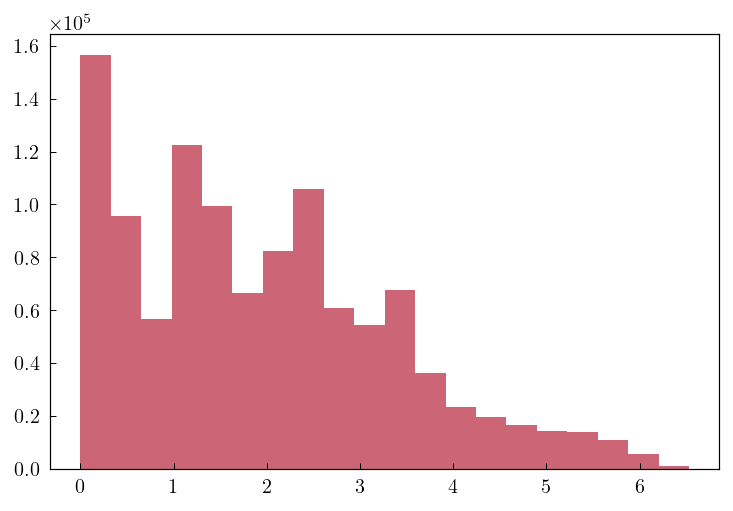

In [120]:
hb_i = util.smooth_moving_average([t[:, -1] for t in second_half], 10)
plt.hist(np.concatenate(hb_i), bins=20)

(array([158693., 164139., 130447., 142714., 131484., 108997., 146963.,
        172384., 122952., 123541., 132052.,  71831.,  47931.,  41024.,
         30368.,  23324.,  22330.,  13427.,   4717.,    682.]),
 array([0.    , 0.3275, 0.655 , 0.9825, 1.31  , 1.6375, 1.965 , 2.2925,
        2.62  , 2.9475, 3.275 , 3.6025, 3.93  , 4.2575, 4.585 , 4.9125,
        5.24  , 5.5675, 5.895 , 6.2225, 6.55  ]),
 <BarContainer object of 20 artists>)

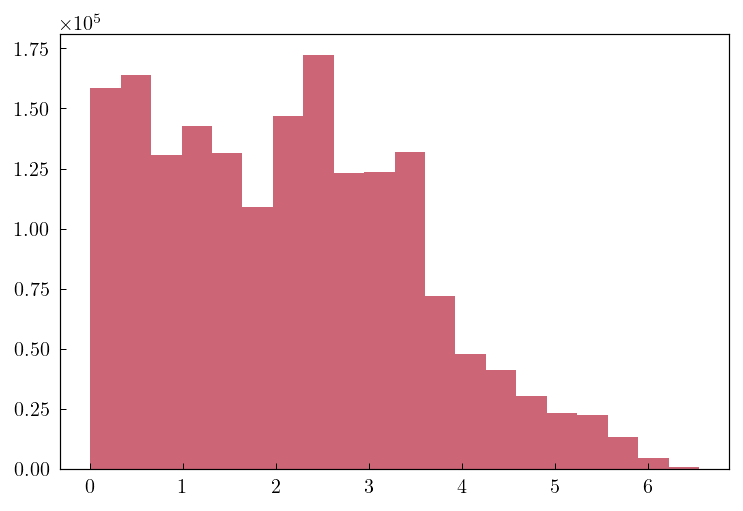

In [114]:
hb_old = np.load("../../data/raw_feat/hbond_water_0-179.npy")
hb_i = util.smooth_moving_average(list(hb_old[:, :, -1]), 10)
plt.hist(np.concatenate(hb_i), bins=20)

In [121]:
np.save(f"{DATA_DIR}/raw_feat/hbond_water_179-300_reshaped.npy", second_half)

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


# Load data

In [5]:
DATA_DIR = "/project/dinner/scguo/ci-vsd/data"
# S4 translocation/rotation data
cv_trajs = list(
    np.load(f"{DATA_DIR}/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(np.load(f"{DATA_DIR}/raw_feat/cv_dist_spin_anton2.npy")[:115])
cv_arr = np.concatenate(cv_trajs)
# salt bridge distances for states
sb_trajs = list(np.load(f"{DATA_DIR}/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
sb_trajs.extend(np.load(f"{DATA_DIR}/raw_feat/feat2_raw_anton2.npy")[:115])
sb_arr = np.concatenate(sb_trajs)
sb_models = np.load(f"{DATA_DIR}/models_centroids_feat2.npy")

# Hydrogen bonding (with new cutoffs 3.5 and 120)
hb_phos = list(np.load(f"{DATA_DIR}/raw_feat/hbond_phos_0-179.npy"))
hb_phos.extend(
    np.load(f"{DATA_DIR}/raw_feat/hbond_phos_179-300_reshaped.npy", allow_pickle=True)
)
hb_phos.extend(np.load(f"{DATA_DIR}/raw_feat/hbond_phos_anton2.npy"))
hb_sb = list(np.load(f"{DATA_DIR}/raw_feat/hbonds.npy", allow_pickle=True))
hb_sb.extend(np.load(f"{DATA_DIR}/raw_feat/hbonds_anton2.npy"))

hb_water = list(np.load(f"{DATA_DIR}/raw_feat/hbond_water_0-179.npy"))
hb_water.extend(
    np.load(f"{DATA_DIR}/raw_feat/hbond_water_179-300_reshaped.npy", allow_pickle=True)
)
hb_water.extend(np.load(f"{DATA_DIR}/raw_feat/hbond_water_anton2.npy"))

# committors
lag = 500
qp_du = np.load(f"{DATA_DIR}/feat2_dist_du_anton2/qp_downup_3.npy", allow_pickle=True)[
    8
]  # 50 ns lag time
# weights
weights = np.load(
    f"{DATA_DIR}/feat2_dist_du_anton2/weights_3_feat5ivac.npy", allow_pickle=True
)[
    0
]  # 0.1 ns lag time

# Plots

In [6]:
hb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "E183", "D186"):
        hb_labels.append(f"{r}-{n}")

In [7]:
# states to do stopping
dist = cv_arr[:, 0]
rot = cv_arr[:, 1]
sb1 = sb_arr[:, 42]  # R226-D129
sb2 = sb_arr[:, 47]  # R226-D186
sb3 = sb_arr[:, 48]  # R229-D129
sb4 = sb_arr[:, 53]  # R229-D186
sb5 = sb_arr[:, 59]  # R232-D186

# ellipse centered at down centroid with radii 1.1 nm and 8 deg (1 sigma in each direction)
# take points where R2-D186 < 0.5 (lower salt bridges), R2-D129 > 0.6 (upper salt bridge)
dist_ax_down = (dist + 4.240) / 1.1
rot_ax_down = (rot + 56.95) / 8
down_ids = ((dist_ax_down ** 2 + rot_ax_down ** 2) < 1) & (sb1 > 0.6) & (sb2 < 0.5)

# ellipse centered at up centroid with radii 0.84 nm and 7.6 deg (2 sigma in each direction)
# take points where R2-D129 (up) < 0.5, R3-D129 < 1.1, R3/R4-D186 salt bridges < 0.75/0.6 nm
up_ids = (
    ((((dist + 0.506) / 0.84) ** 2 + ((rot - 3.94) / 7.6) ** 2) < 1)
    & (sb1 < 0.5)
    & (sb3 < 1.1)
    & (sb4 < 0.75)
    & (sb5 < 0.6)
)

In [8]:
mask = ~(down_ids | up_ids)
traj_inds = util.split_indices(cv_trajs)
in_domain = np.split(mask, traj_inds)

In [9]:
from extq.stop import forward_stop

In [10]:
# compute E[\theta(x) S_tq_+(x)]
w_delay = [w[:-lag] for w in weights]
qp_delay = []
for d, t in zip(in_domain, qp_du):
    # find first stopping time
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(t[stop_times])

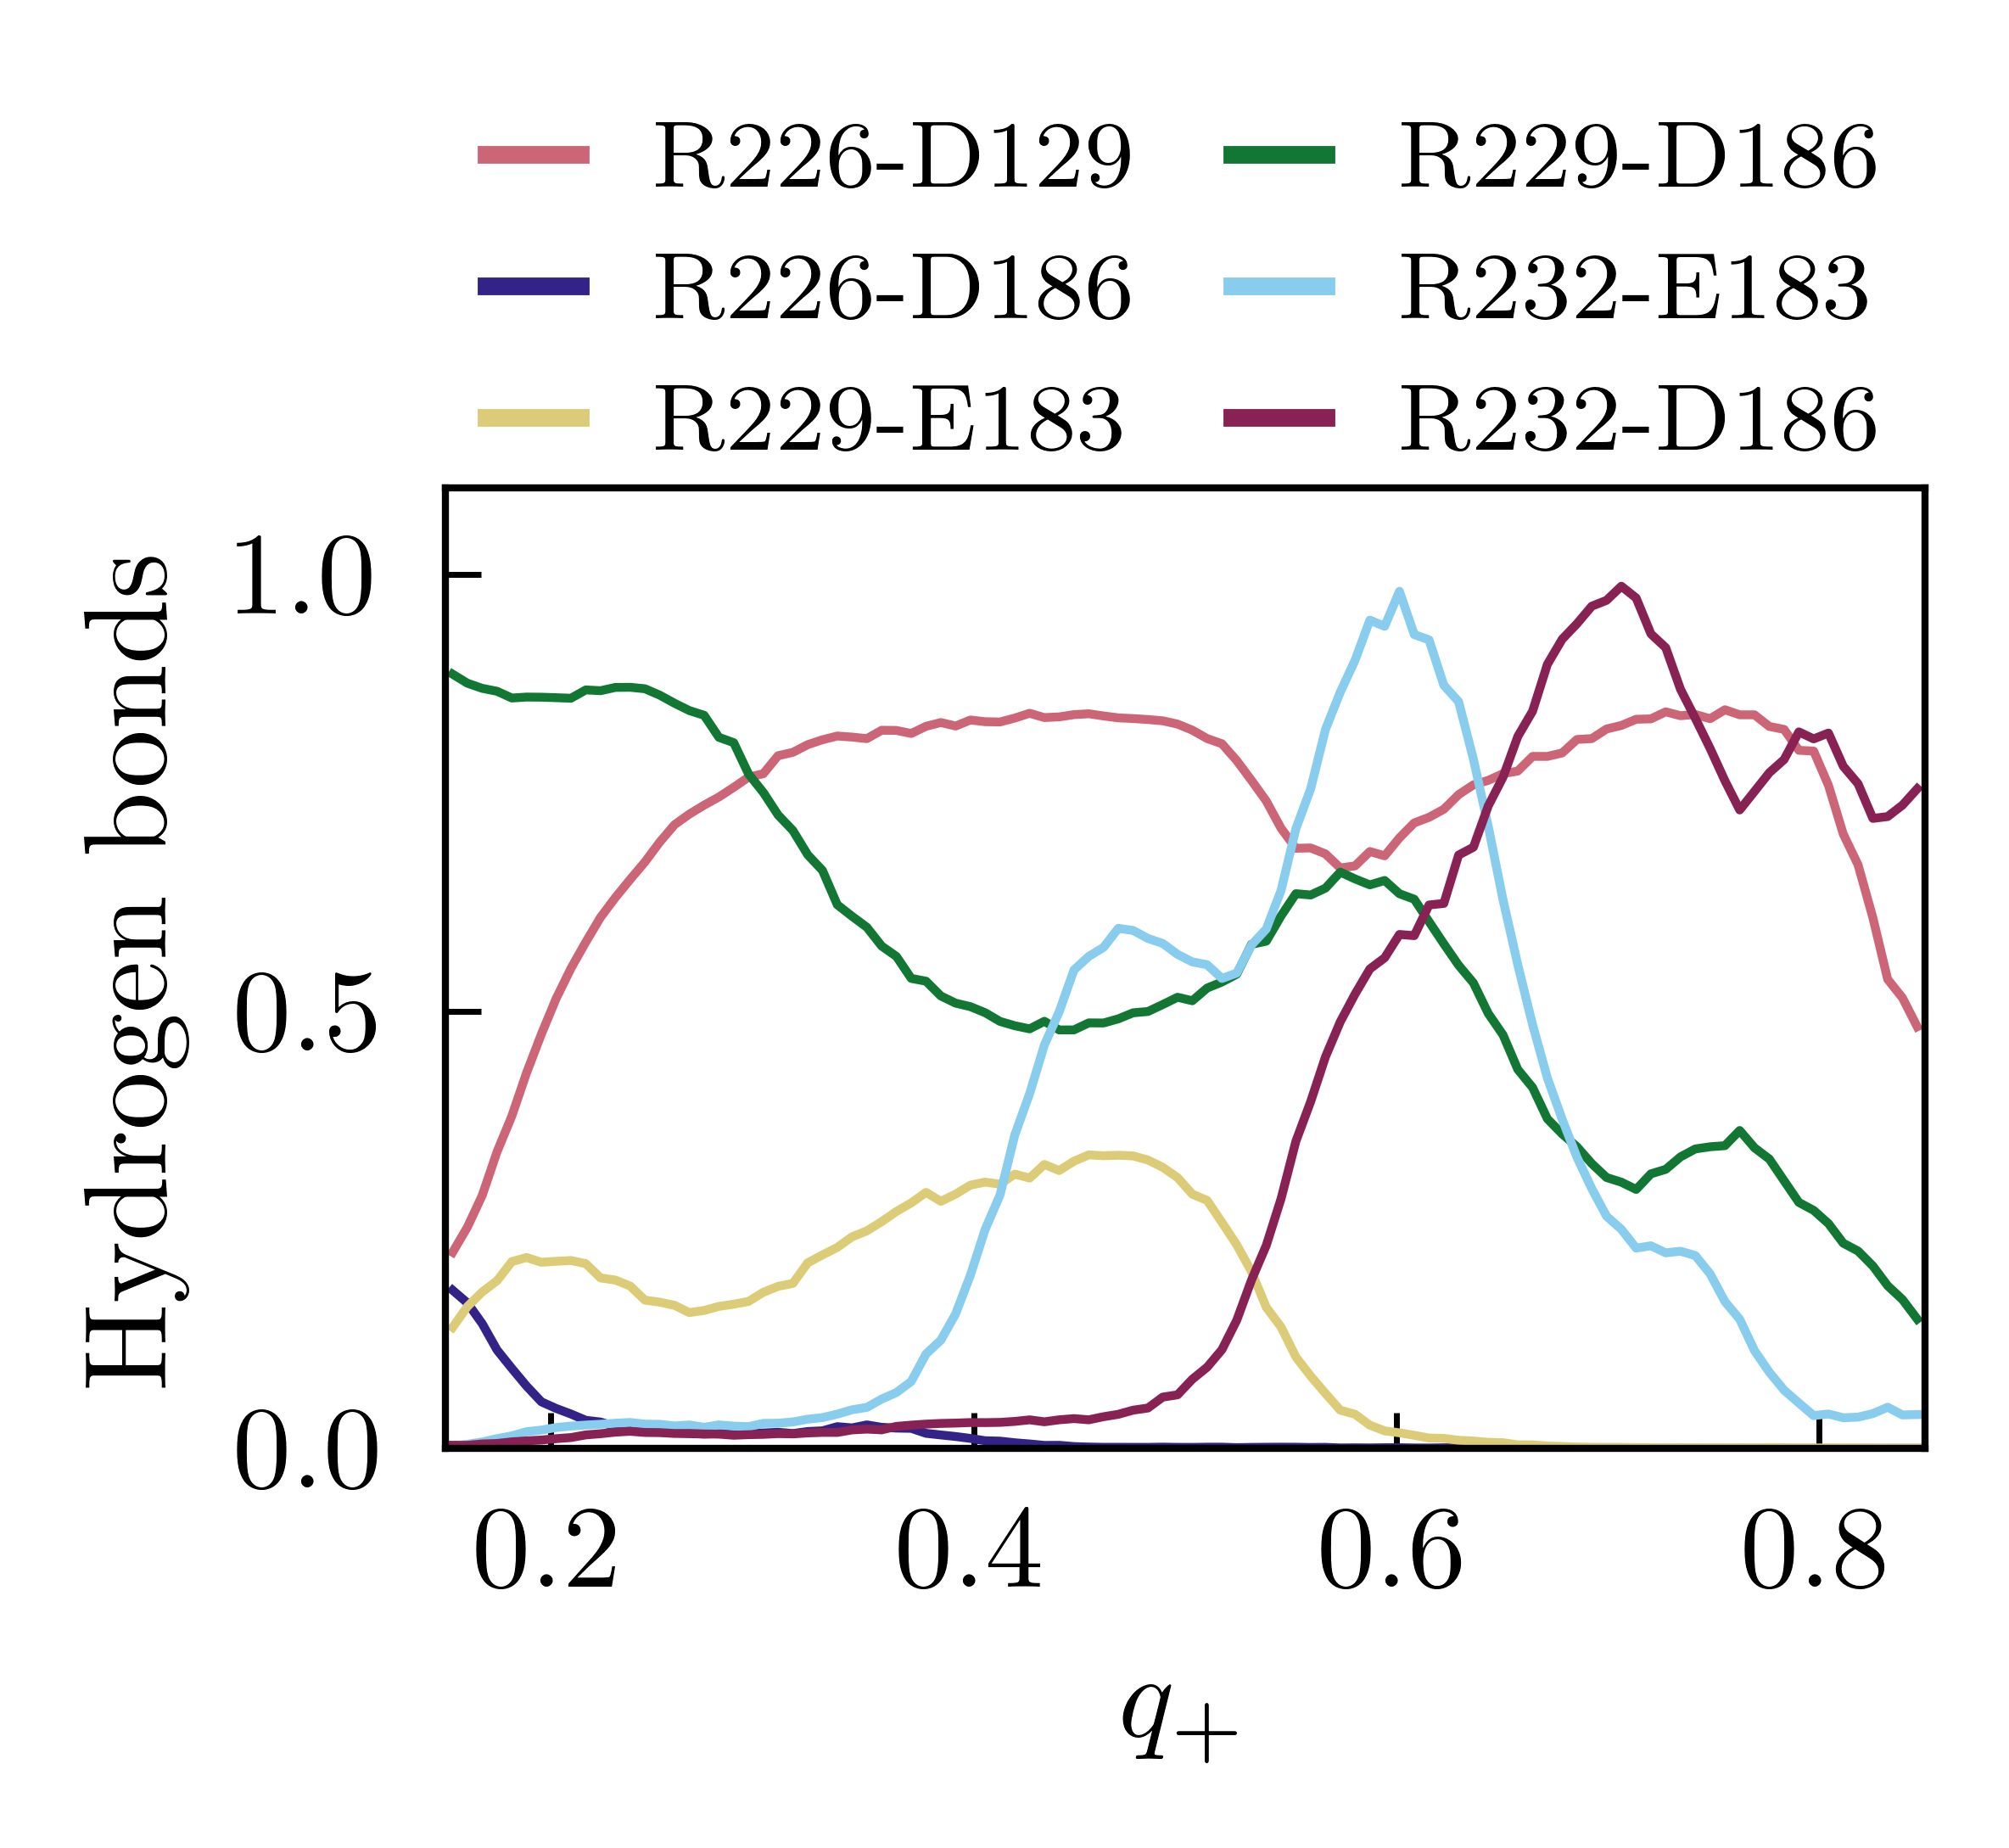

In [16]:
f = plt.figure(figsize=(2.25, 1.5), dpi=500)
ax = plt.gca()

lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

for i in (6, 8, 10, 11, 13, 14):
    hb_i = util.smooth_moving_average([t[:-lag, i] for t in hb_sb], 100, 1)
    q_dens = extq.projection.average1d(qp_delay, hb_i, w_delay, qe)
    ax.plot(qc, q_dens, label=f"{hb_labels[i]}")


ax.set_xlabel("$q_+$")
ax.set_ylabel("Hydrogen bonds")
ax.set_xlim([lo, hi])
ax.set_ylim([0, 1.1])
# ax.axvspan(0, 0.15, color='gray', alpha=0.75, ec=None, zorder=5)
# ax.axvspan(0.85, 1.0, color='gray', alpha=0.75, ec=None, zorder=5)


leg = plt.legend(
    bbox_to_anchor=(0.5, 1.2),
    loc="center",
    ncol=2,
    columnspacing=1,
    handlelength=1,
    facecolor="white",
    fontsize=8,
)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)

## Note: recompute with old Anton data (done)

In [11]:
qp_delay, w_delay = [], []
for i, (qt, wt, d) in enumerate(zip(qp_du, weights, in_domain)):
    if i == 180:
        continue
    w_delay.append(wt[:-lag])
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(qt[stop_times])

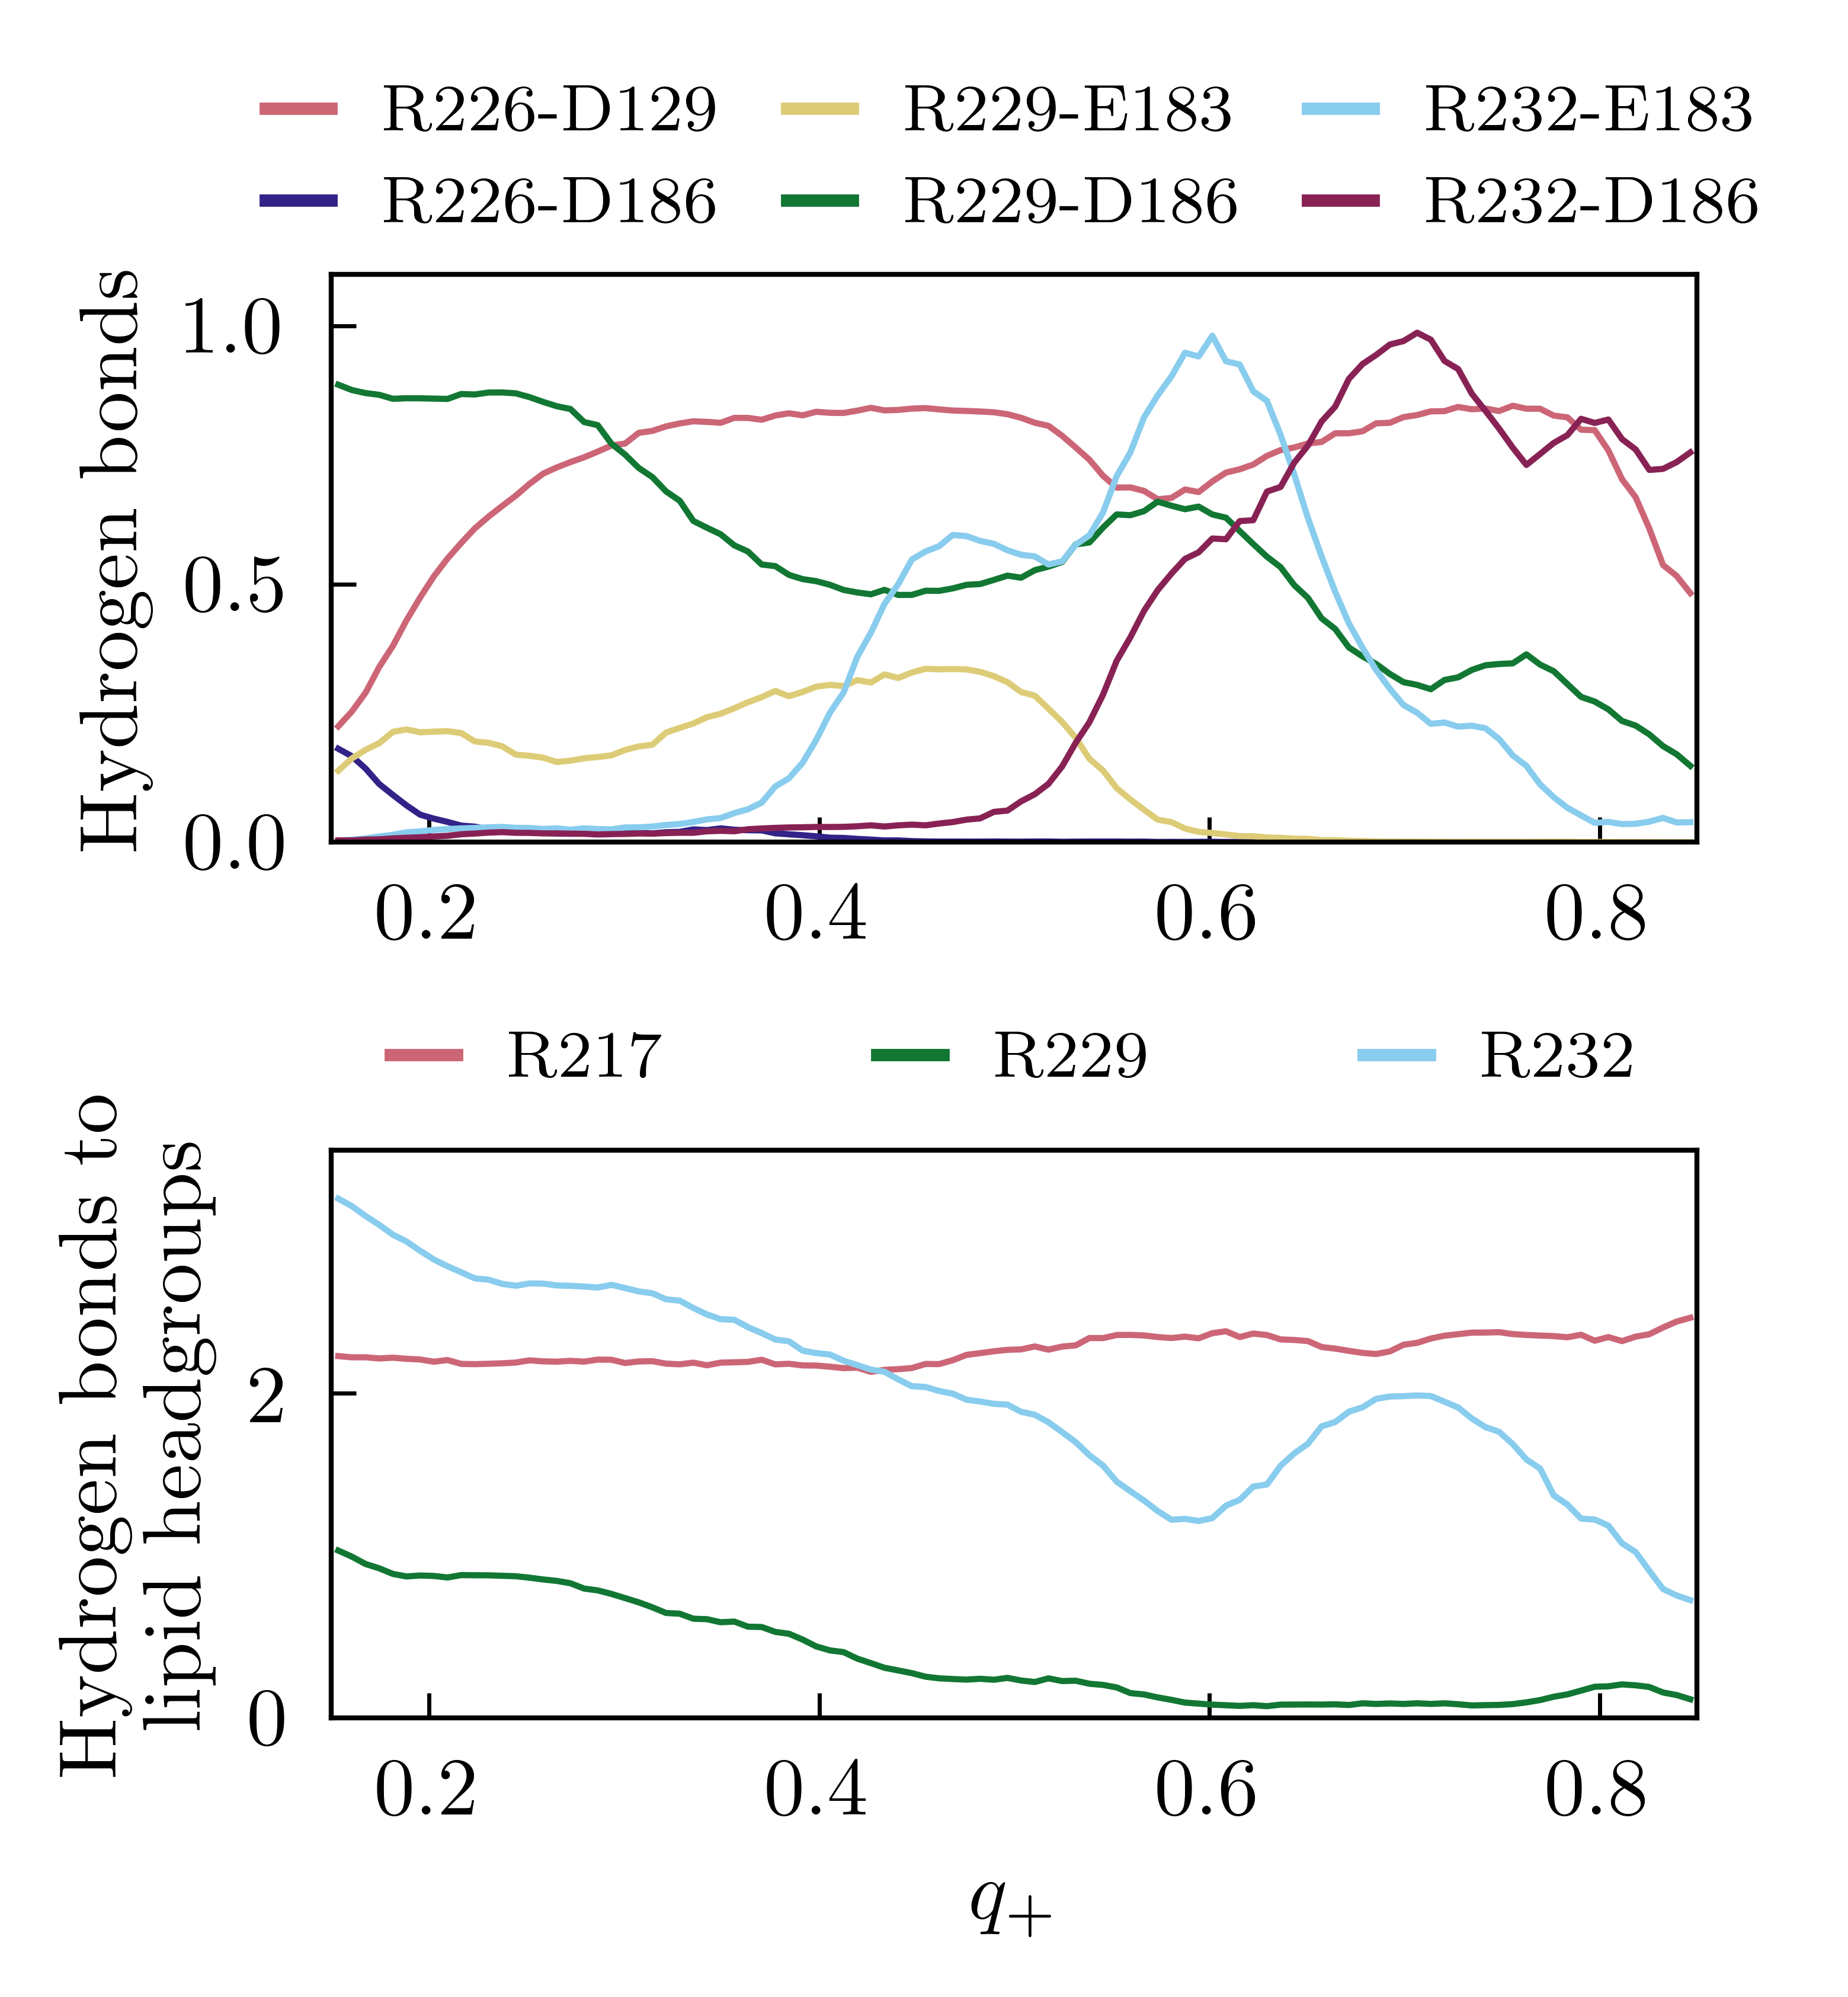

In [21]:
f, (ax0, ax1) = plt.subplots(
    2, 1, figsize=(3.0, 3.25), dpi=500, constrained_layout=True
)

lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

w_delay = [w[:-lag] for w in weights]
qp_delay = []
for d, t in zip(in_domain, qp_du):
    # find first stopping time
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(t[stop_times])
for i in (6, 8, 10, 11, 13, 14):
    hb_i = util.smooth_moving_average([t[:-lag, i] for t in hb_sb], 100, 1)
    q_dens = extq.projection.average1d(qp_delay, hb_i, w_delay, qe)
    ax0.plot(qc, q_dens, label=f"{hb_labels[i]}")

# ax.set_xlabel("$q_+$")
ax0.set_ylabel("Hydrogen bonds")
ax0.set_xlim([lo, hi])
ax0.set_ylim([0, 1.1])
leg = ax0.legend(
    bbox_to_anchor=(0.5, 1.2),
    loc="center",
    ncol=3,
    columnspacing=1,
    handlelength=1,
    facecolor="white",
    fontsize=8,
)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)

qp_delay, w_delay = [], []
for i, (qt, wt, d) in enumerate(zip(qp_du, weights, in_domain)):
    if i == 180:
        continue
    w_delay.append(wt[:-lag])
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(qt[stop_times])
labels = ["R217", "R223", "R226", "R229", "R232"]
for i in (0, 3, 4):
    hb_traj = util.smooth_moving_average([t[:-lag, i] for t in hb_phos], 100, n=1)
    q_dens = extq.projection.average1d(qp_delay, hb_traj, w_delay, qe)
    ax1.plot(qc, q_dens, label=labels[i], color=f"C{i}")

ax1.set_xlim([lo, hi])
ax1.set_ylim([0, 3.5])
ax1.set_xlabel("$q_+$")
ax1.set_ylabel("Hydrogen bonds to \nlipid headgroups")
leg1 = pplt.legend(
    outside="top",
    ncol=3,
    columnspacing=0.5,
    handlelength=1,
    facecolor="white",
    fontsize=8,
)
for legobj in leg1.legendHandles:
    legobj.set_linewidth(1.5)

# Hydration

In [12]:
qp_delay, w_delay = [], []
for i, (qt, wt, d) in enumerate(zip(qp_du, weights, in_domain)):
    if i == 180:
        continue
    w_delay.append(wt[:-lag])
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(qt[stop_times])

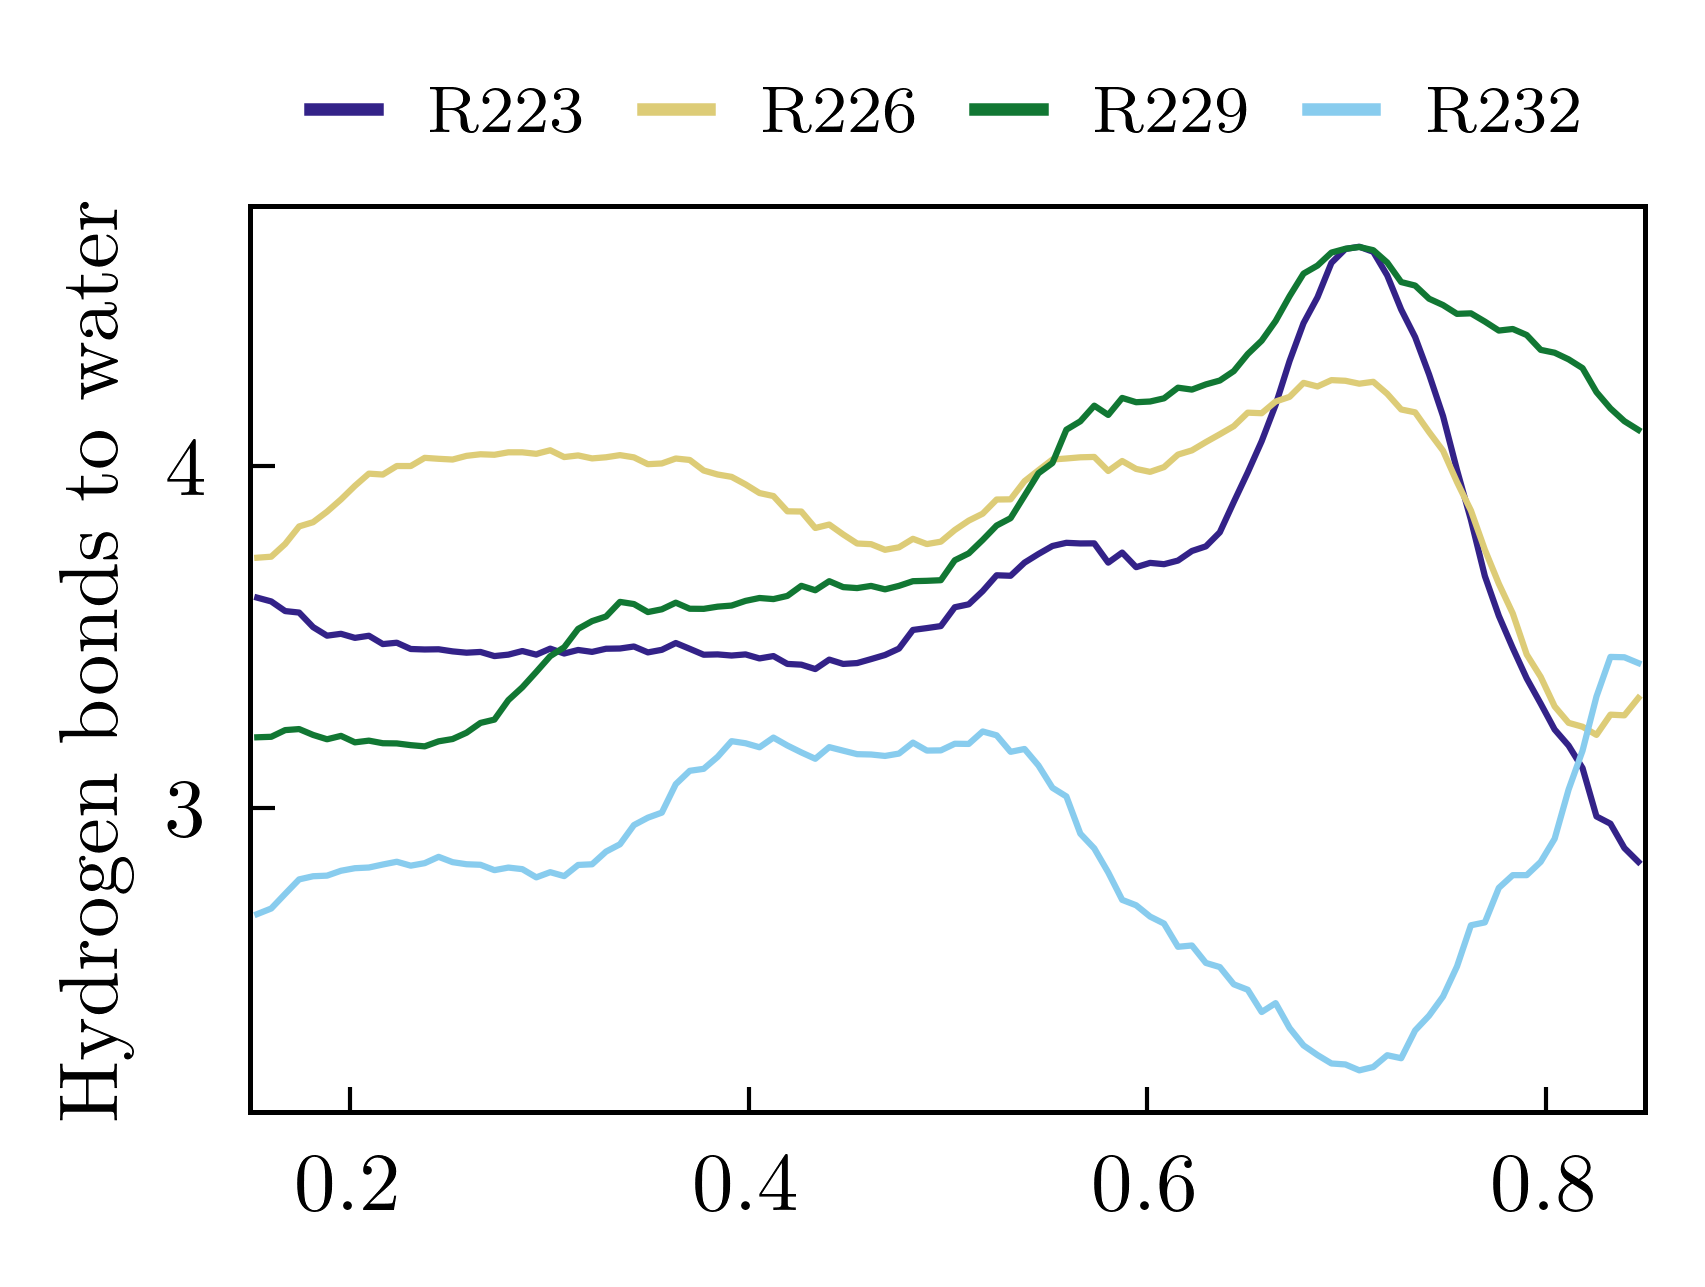

In [33]:
f, ax = plt.subplots(figsize=(3.0, 2), dpi=300)
lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

labels = ["R217", "R223", "R226", "R229", "R232"]
for i in range(1, 5):
    hb_traj = util.smooth_moving_average([t[:-lag, i] for t in hb_water], 10, n=1)
    q_dens = extq.projection.average1d(qp_delay, hb_traj, w_delay, qe)
    ax.plot(qc, q_dens, label=labels[i], color=f"C{i}")

plt.xlim([lo, hi])
# plt.ylim([0, 2.0])
plt.ylabel("Hydrogen bonds to water")
leg = pplt.legend(
    outside="top",
    ncol=4,
    columnspacing=1,
    handlelength=1,
    facecolor="white",
    fontsize=8,
)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)

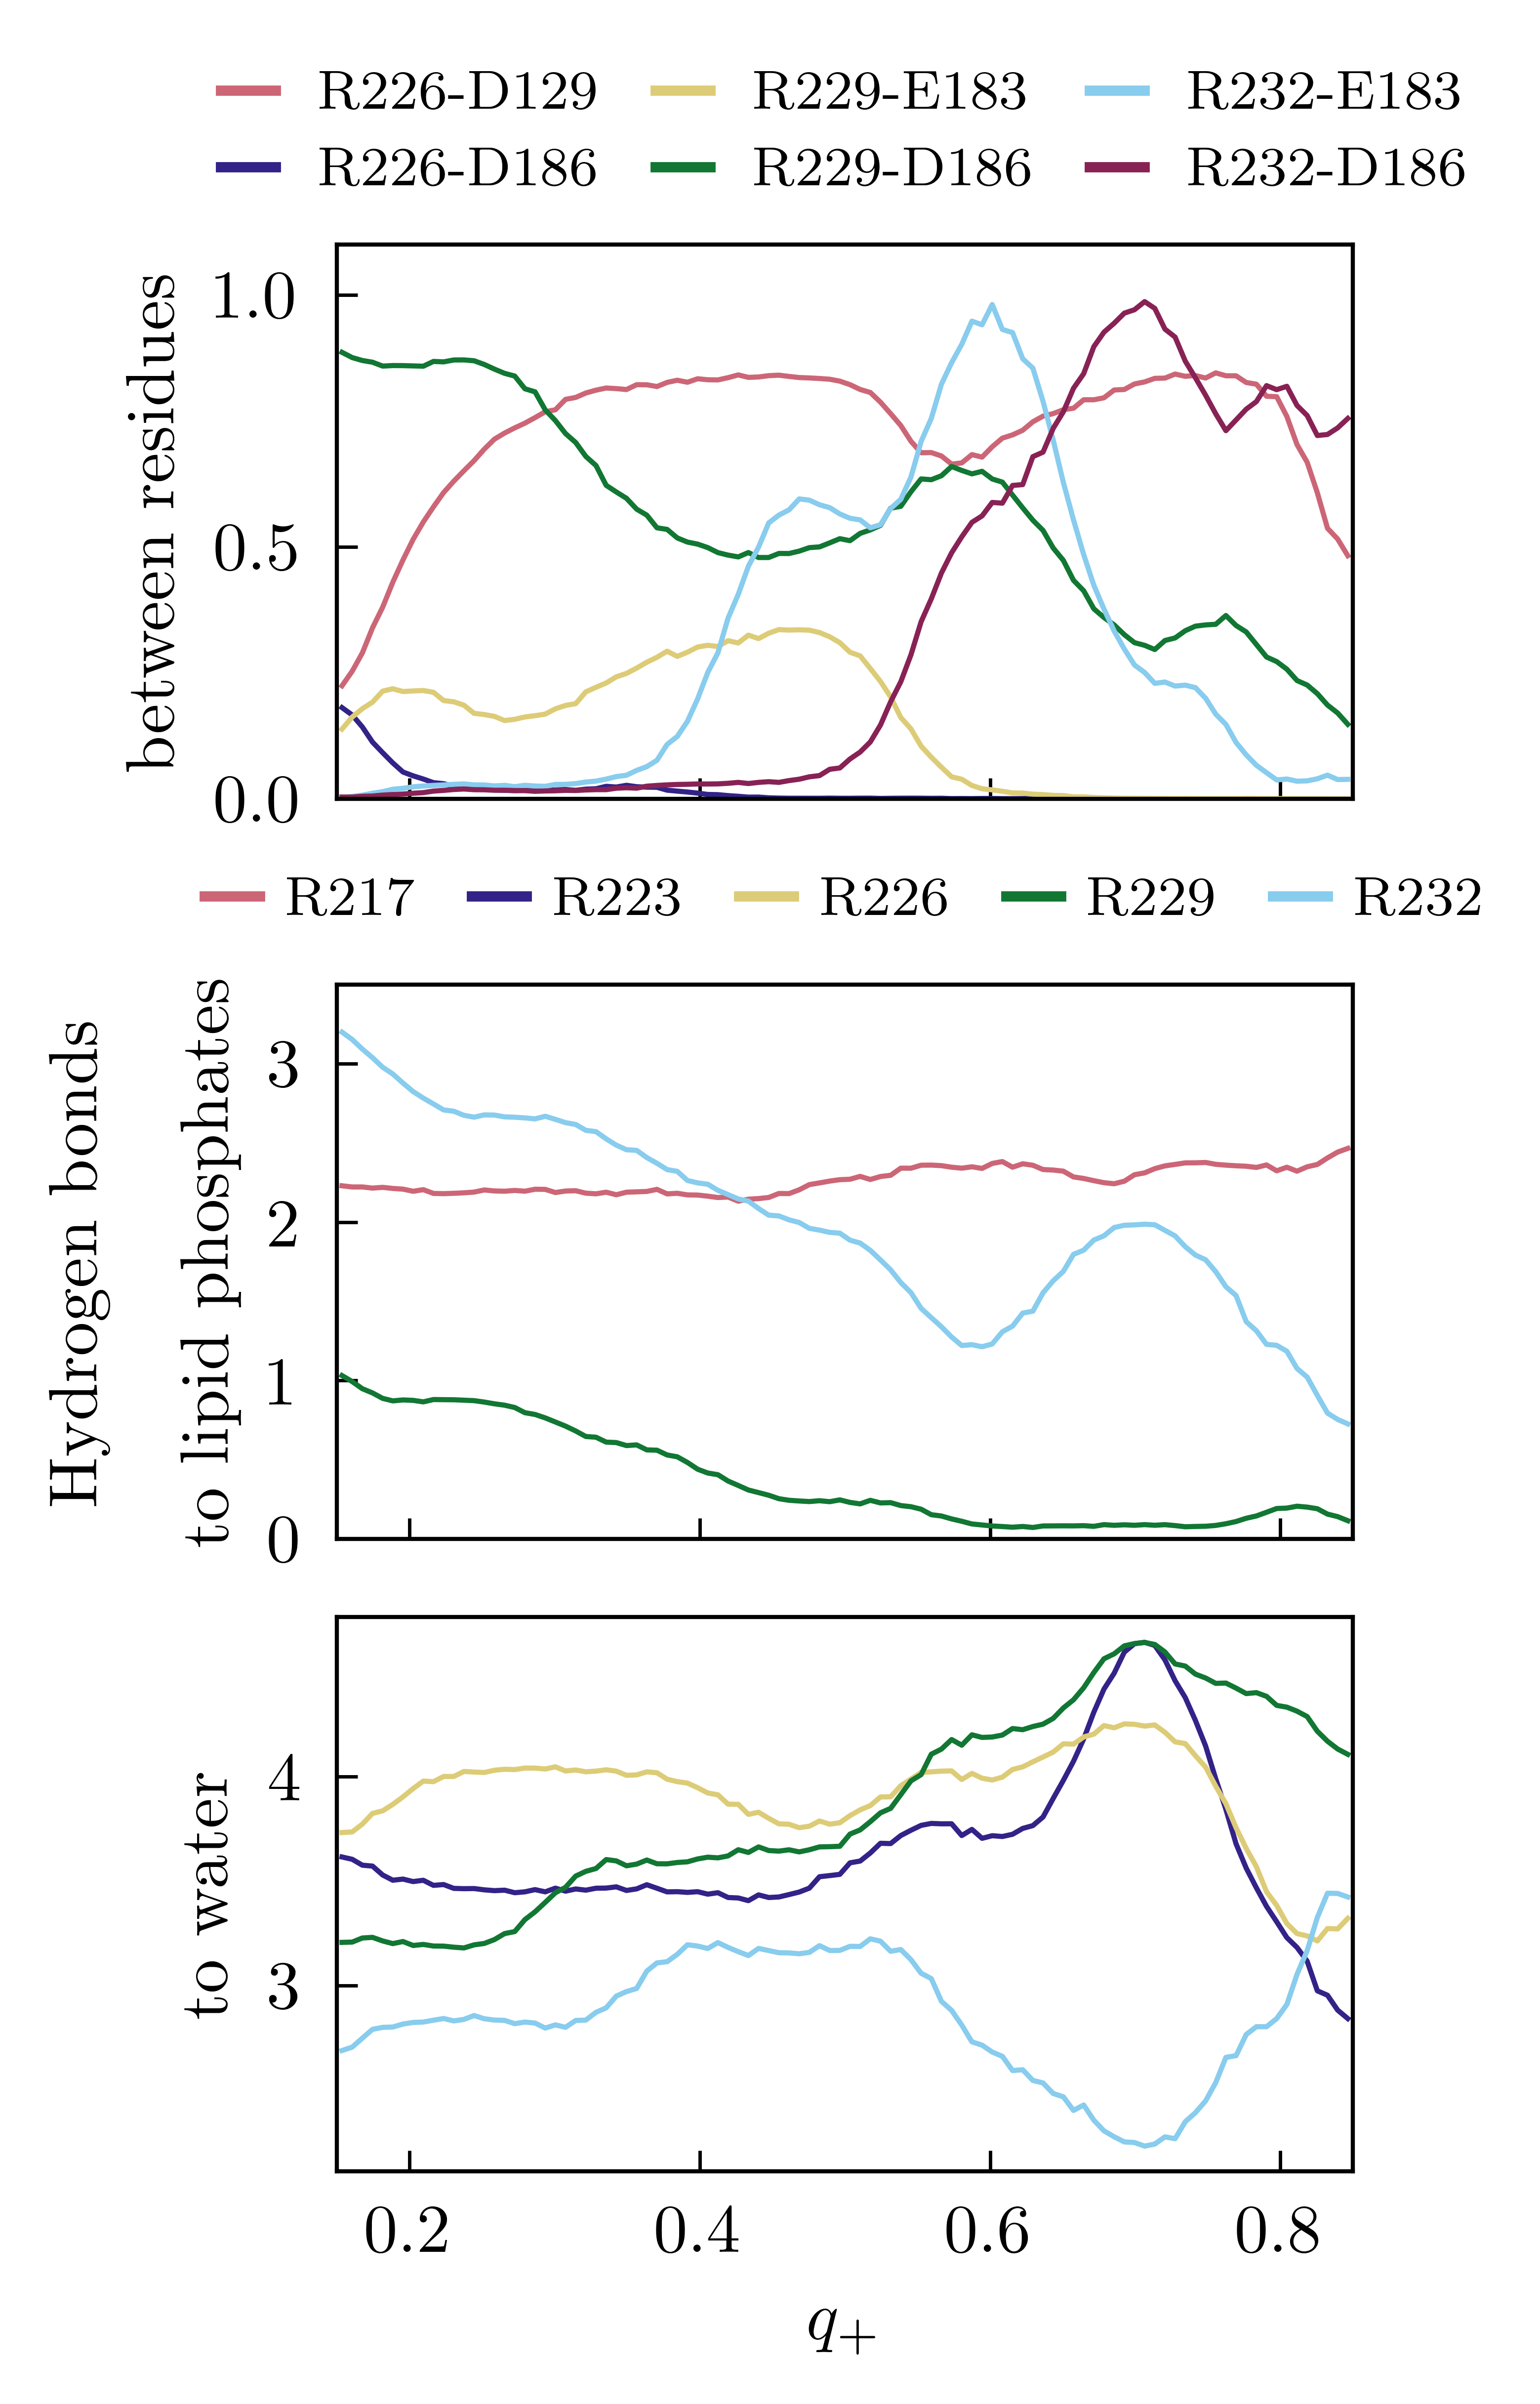

In [13]:
f, (ax0, ax1, ax2) = plt.subplots(
    3, 1, figsize=(3.0, 4.75), dpi=500, sharex=True, constrained_layout=True
)

lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

w_delay = [w[:-lag] for w in weights]
qp_delay = []
for d, t in zip(in_domain, qp_du):
    # find first stopping time
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(t[stop_times])
for i in (6, 8, 10, 11, 13, 14):
    hb_i = util.smooth_moving_average([t[:-lag, i] for t in hb_sb], 100, 1)
    q_dens = extq.projection.average1d(qp_delay, hb_i, w_delay, qe)
    ax0.plot(qc, q_dens, label=f"{hb_labels[i]}")

# ax.set_xlabel("$q_+$")
ax0.set_ylabel("between residues")
ax0.set_xlim([lo, hi])
ax0.set_ylim([0, 1.1])
leg = ax0.legend(
    bbox_to_anchor=(0.5, 1.2),
    loc="center",
    ncol=3,
    columnspacing=1,
    handlelength=1,
    facecolor="white",
    fontsize=8,
)

qp_delay, w_delay = [], []
for i, (qt, wt, d) in enumerate(zip(qp_du, weights, in_domain)):
    if i == 180:
        continue
    w_delay.append(wt[:-lag])
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(qt[stop_times])
labels = ["R217", "R223", "R226", "R229", "R232"]
for i in (0, 3, 4):
    hb_traj = util.smooth_moving_average([t[:-lag, i] for t in hb_phos], 100, n=1)
    q_dens = extq.projection.average1d(qp_delay, hb_traj, w_delay, qe)
    ax1.plot(qc, q_dens, label=labels[i], color=f"C{i}")

ax1.set_xlim([lo, hi])
ax1.set_ylim([0, 3.5])
ax1.set_ylabel("to lipid phosphates")

labels = ["R217", "R223", "R226", "R229", "R232"]
for i in range(1, 5):
    hb_traj = util.smooth_moving_average([t[:-lag, i] for t in hb_water], 10, n=1)
    q_dens = extq.projection.average1d(qp_delay, hb_traj, w_delay, qe)
    ax2.plot(qc, q_dens, label=labels[i], color=f"C{i}")

ax2.set_xlim([lo, hi])
ax2.set_ylabel("to water")
ax2.set_xlabel("$q_+$")

ax1.annotate("Hydrogen bonds", (0, 0.5),
            (-35, 0),
            xycoords="axes fraction",
            textcoords="offset points",
            ha="center",
            va="baseline",
            rotation=90,
            rotation_mode="anchor")

handles = []
h, _ = ax1.get_legend_handles_labels()
handles.append(h[0])
h, _ = ax2.get_legend_handles_labels()
handles.extend(h)
leg2 = ax1.legend(
    bbox_to_anchor=(0.5, 1.15),
    loc='center',
    ncol=5,
    columnspacing=1.0,
    handlelength=1,
    handletextpad=0.5,
    facecolor="white",
    fontsize=8,
    handles=handles,
    borderpad=0.0
)

for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)
for legobj in leg2.legendHandles:
    legobj.set_linewidth(1.5)

plt.savefig("../../fig/paper/hbonds_all_update.pdf", bbox_inches='tight')

# PMF on committor

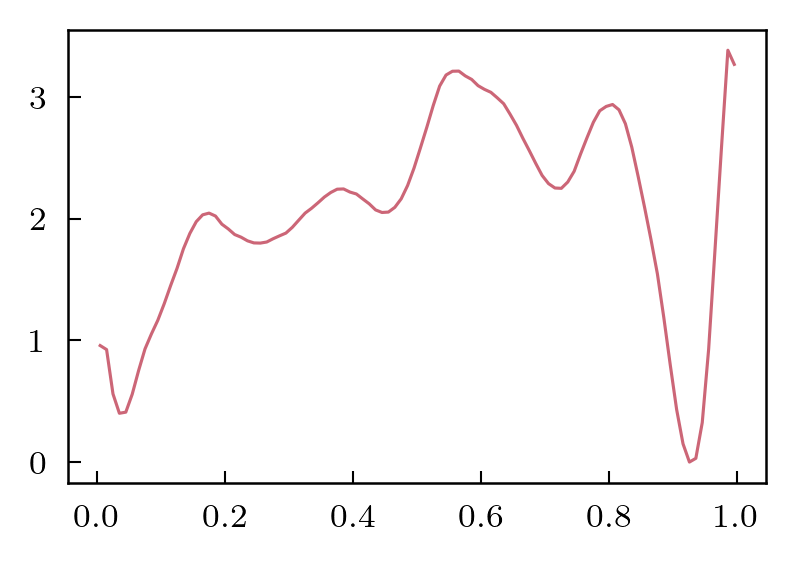

In [12]:
f, ax = plt.subplots(figsize=(3.0, 2), dpi=300)
lo, hi = 0, 1
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2
dens = extq.projection.density1d(qp_du, weights, qe)
min_e = np.min(-np.log(dens[np.nonzero(dens)]))
pmf = -np.log(dens) - min_e
ax.plot(qc, pmf)